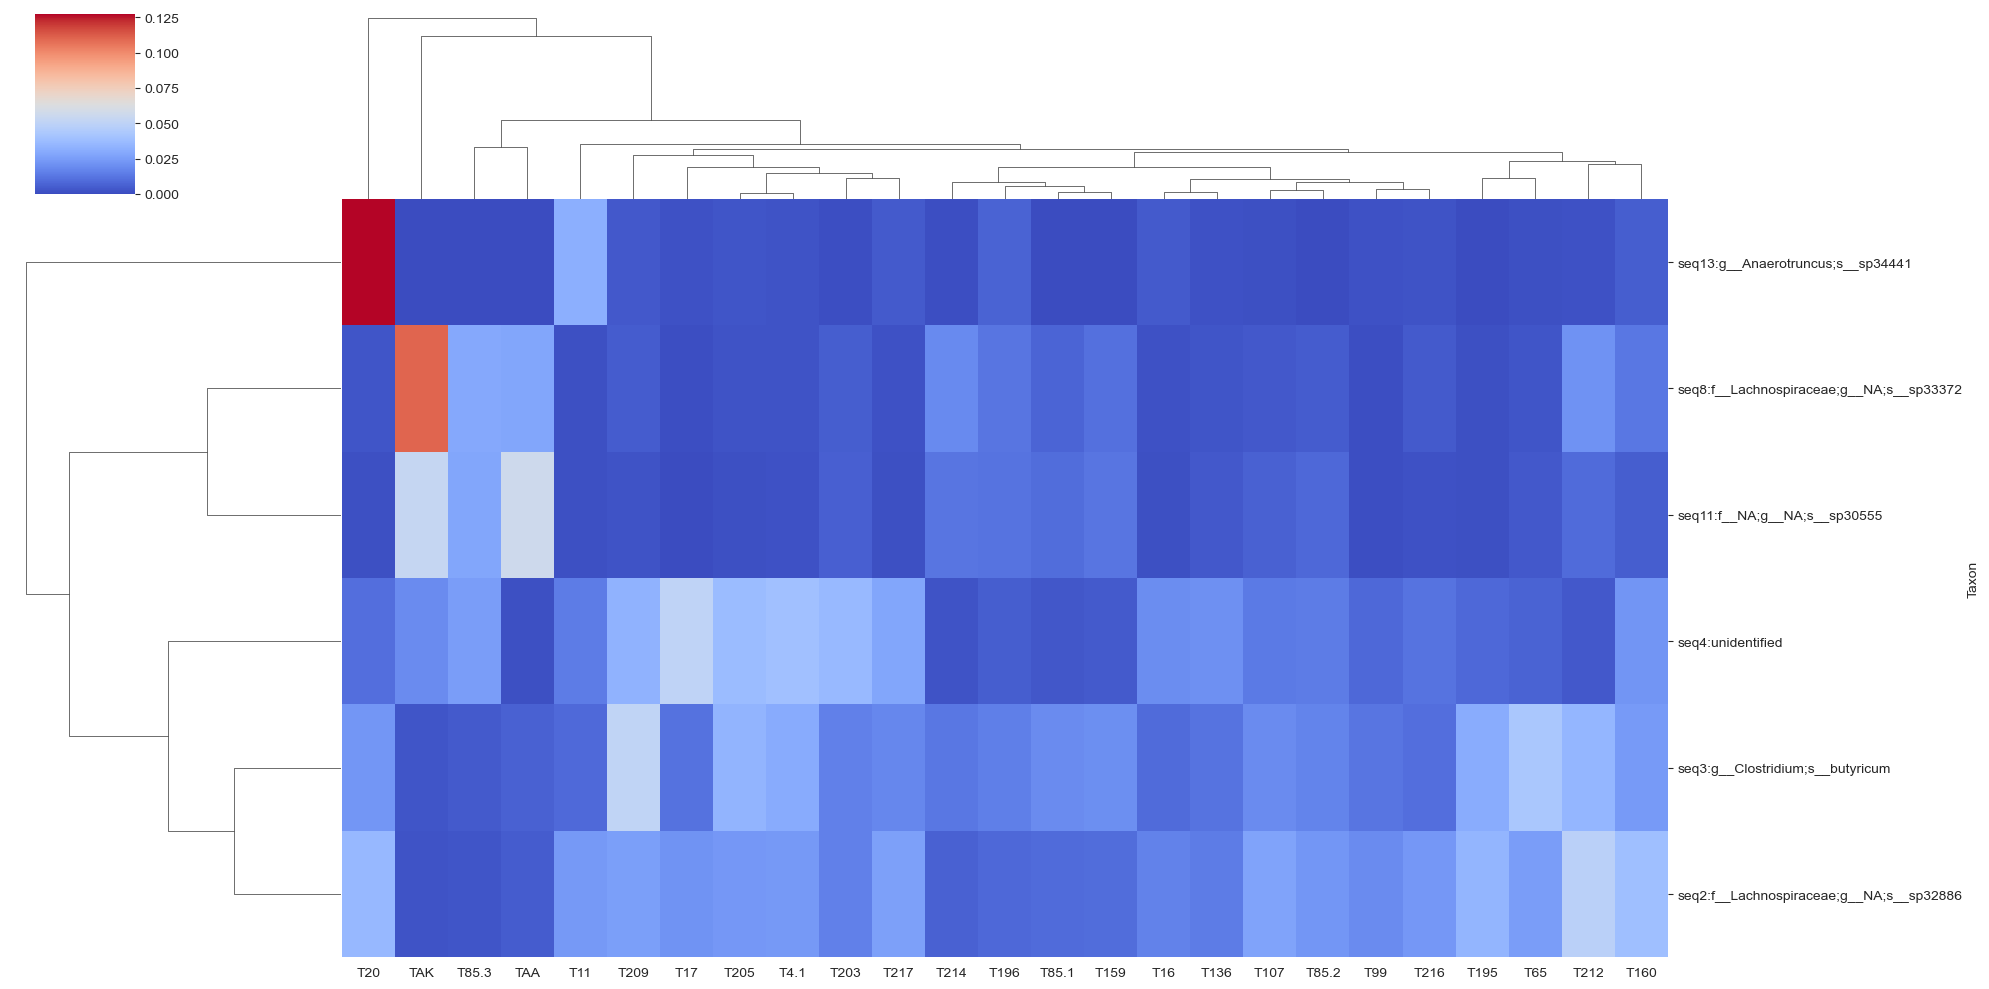

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from a text file
data = pd.read_csv('/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/Raw_Data.txt', delimiter='\t', index_col=0)

# Filter taxa based on variance
threshold = data.var(axis=1).quantile(0.999)  # keeping top 25% variable taxa
high_var_data = data[data.var(axis=1) > threshold]

# Create the clustered heatmap with the (filtered) data
sns.clustermap(high_var_data, method='average', cmap='coolwarm', figsize=(20, 10))

# Show the heatmap
plt.show()

In [5]:
# Filter taxa based on variance
threshold = data.var(axis=1).quantile(0.75)  # keeping top 25% variable taxa
high_var_data = data[data.var(axis=1) > threshold]


In [6]:
# Create the clustered heatmap with the (filtered) data
sns.clustermap(high_var_data, method='average', cmap='viridis', figsize=(10, 10))

# Show the heatmap
plt.show()


/Users/dimitriosgiakoumas/mambaforge/lib/python3.10/site-packages/seaborn/matrix.py:68: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  mask = np.zeros(data.shape, np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

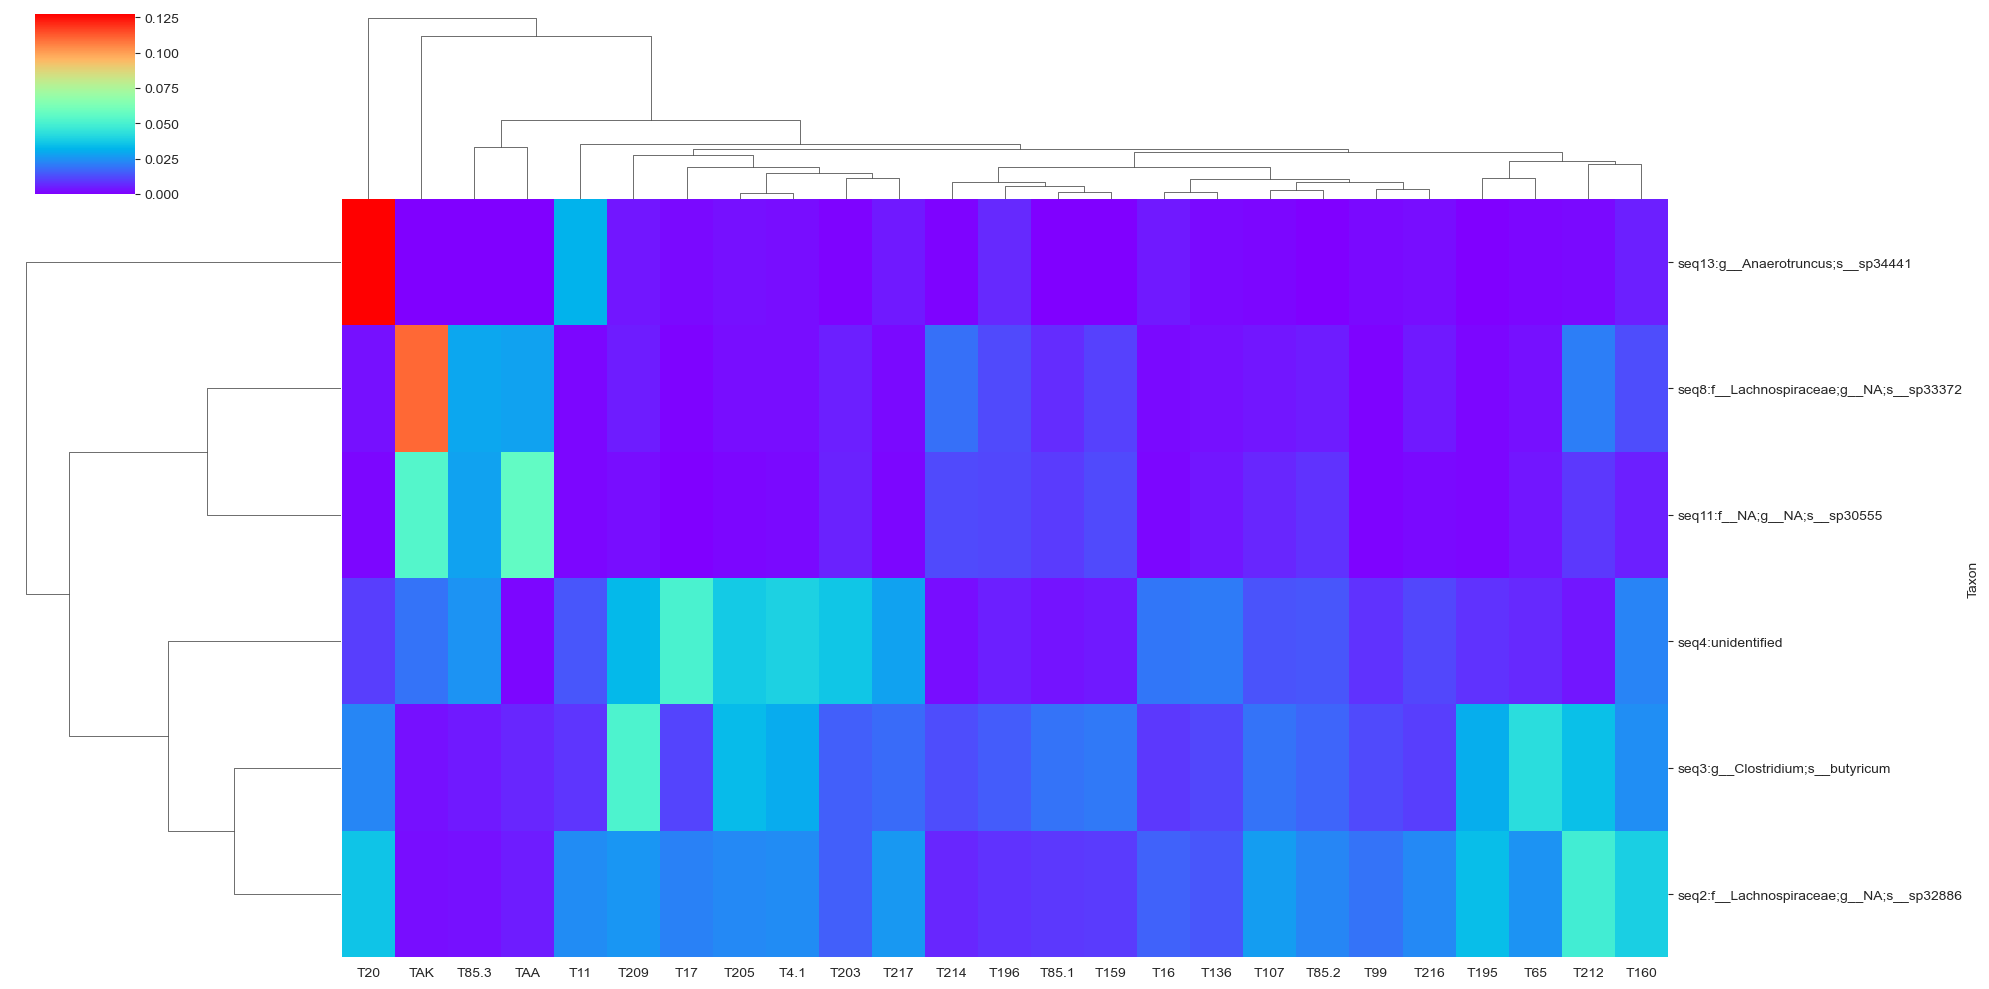

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data from a text file
data = pd.read_csv('/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/Raw_Data.txt', delimiter='\t', index_col=0)

# Calculate the variance for each taxon
variances = data.var(axis=1)

# Determine the threshold for the top 10%
threshold = variances.quantile(0.999)

# Select taxa that have a variance above the threshold
high_var_data = data.loc[variances > threshold]

# Remove any rows or columns with NaN or infinite values
high_var_data = high_var_data.dropna(axis=0, how='any').replace([np.inf, -np.inf], np.nan).dropna(axis=1, how='any')


# Create the clustered heatmap with the filtered data
sns.clustermap(high_var_data, method='average', cmap='rainbow', figsize=(20, 10), row_cluster=True, col_cluster=True)

# Show the heatmap
plt.show()


In [20]:
# Load the necessary library
library(pheatmap)

# Read the data
data <- read.table("/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/Raw_Data.txt", header = TRUE, row.names = 1, sep = "\t")

# Calculate variance for each taxon and filter for the top 10%
variances <- apply(data, 1, var)  # Calculate variance for each row
threshold <- quantile(variances, 0.999)  # Find the 90th percentile
data_filtered <- data[variances > threshold, ]  # Filter rows

# Generate the heatmap
pheatmap(data_filtered, scale = "row", clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean", clustering_method = "complete")


SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (3576016562.py, line 5)

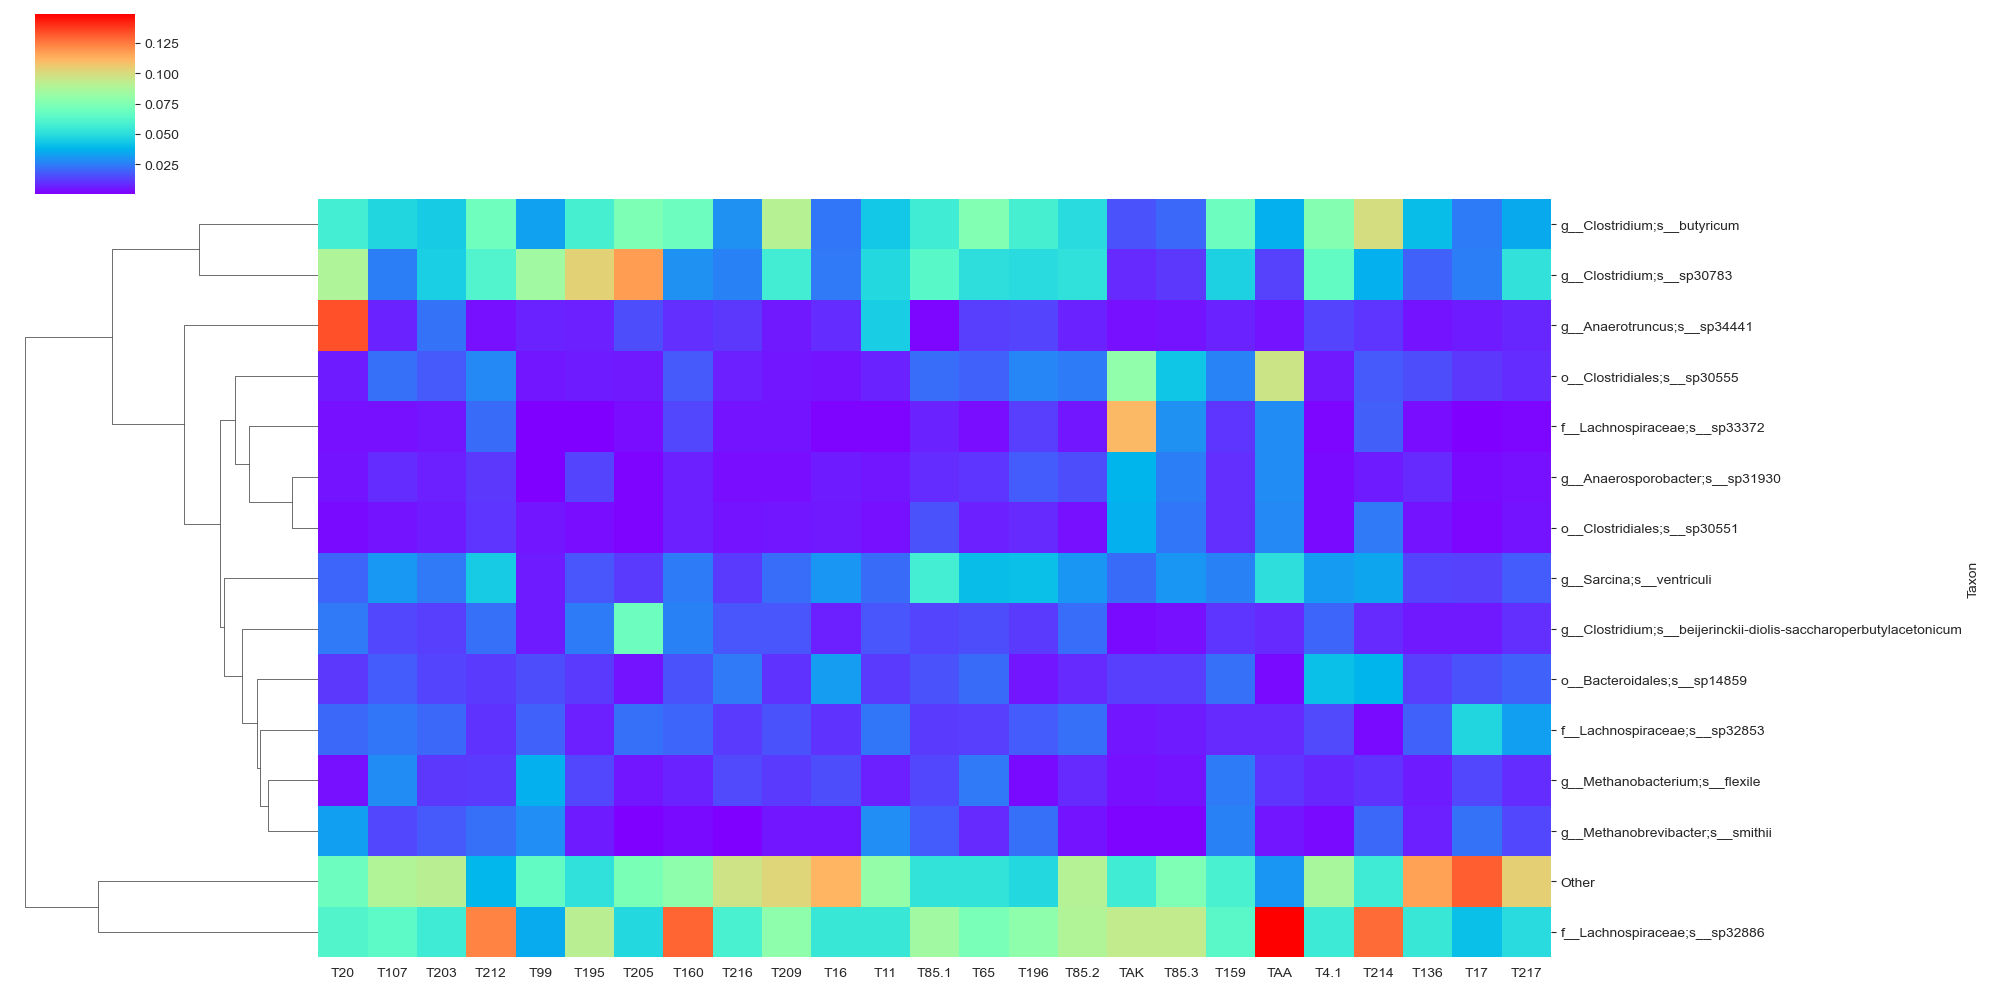

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data from a text file
data = pd.read_csv('/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/taxa_abun_table_L7.txt', delimiter='\t', index_col=0)

# List of male and female samples
male_samples = ["T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16"]
female_samples = ["T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217"]

# Combine the lists to ensure they are in the order you want them to appear in the heatmap
# Assuming that all the column names in 'data' are in these two lists
ordered_samples = male_samples + female_samples

# Calculate the variance for each taxon
variances = data.var(axis=1)

# Determine the threshold for the top 10%
threshold = variances.quantile(0.99)

# Select taxa that have a variance above the threshold
high_var_data = data.loc[variances > threshold]

# Remove any rows or columns with NaN or infinite values
high_var_data = high_var_data.dropna(axis=0, how='any').replace([np.inf, -np.inf], np.nan).dropna(axis=1, how='any')

# Reorder the columns based on the ordered_samples
high_var_data = high_var_data[ordered_samples]

# Create the clustered heatmap with the filtered data
# Note: 'col_cluster=False' to keep the male/female order
sns.clustermap(high_var_data, method='average', cmap='rainbow', figsize=(20, 10), row_cluster=True, col_cluster=False)

# Show the heatmap
plt.show()


<Figure size 1920x1440 with 0 Axes>

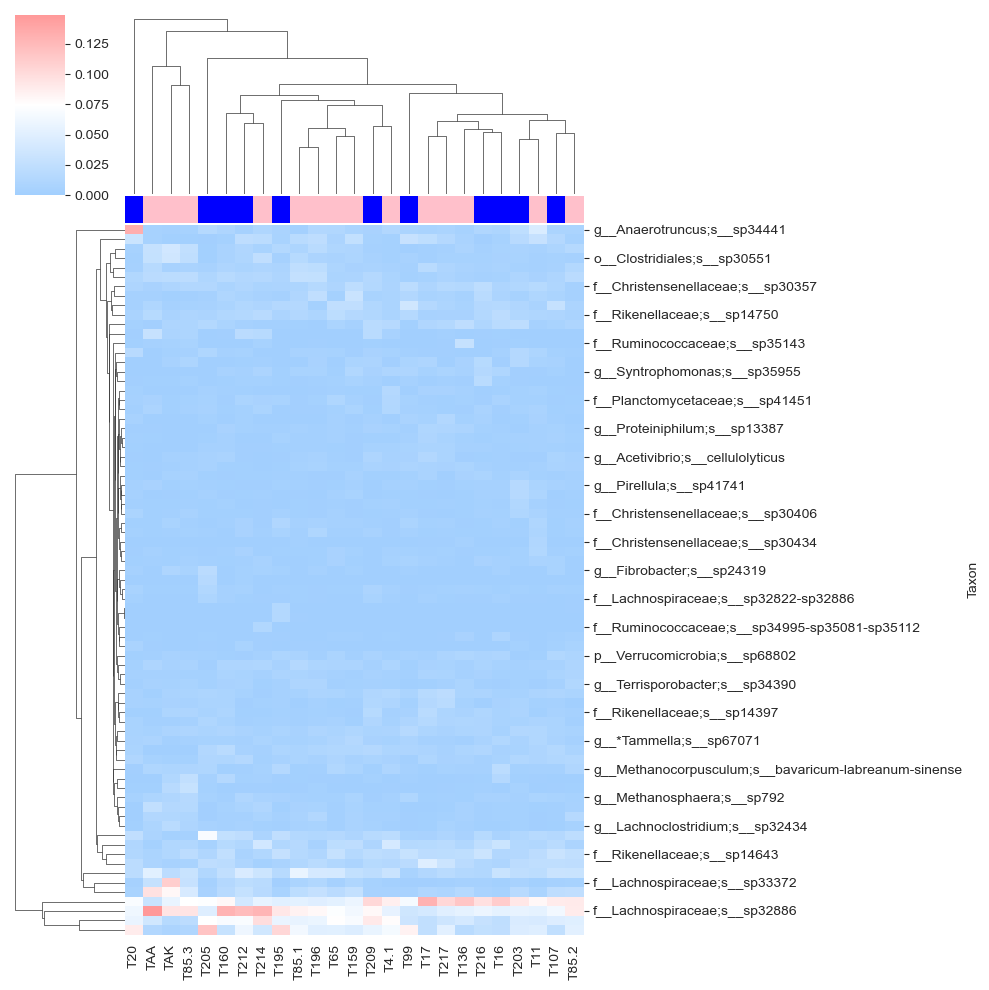

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# Function to replace np.bool with bool in Seaborn's matrix.py
def fix_seaborn_bool():
    import seaborn.matrix

    def new_matrix_mask(data, mask):
        """Ensure that data and mask are compatible and add missing values.

        Values will be plotted for cells where ``mask`` is ``False``.
        """
        if mask is None:
            mask = np.zeros(data.shape, bool)
        if isinstance(mask, np.ndarray):
            # For array masks, ensure that shape matches data then convert
            if mask.shape != data.shape:
                raise ValueError("Mask must have the same shape as data.")
            mask = pd.DataFrame(mask, index=data.index, columns=data.columns)
        elif isinstance(mask, pd.DataFrame):
            # For DataFrame masks, ensure that it matches data indices and columns
            if not mask.index.equals(data.index) or not mask.columns.equals(data.columns):
                raise ValueError("Mask must have the same index and columns as data.")
        else:
            raise ValueError("Mask must be None, a numpy array, or a pandas DataFrame.")
        mask = mask.astype(bool)
        return mask

    seaborn.matrix._matrix_mask = new_matrix_mask

# Fix the Seaborn bool issue
fix_seaborn_bool()

# Load the data from a text file
data = pd.read_csv('/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/taxa_abun_table_L7.txt', delimiter='\t', index_col=0)

# Given sample IDs
male_samples = ["T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16"]
female_samples = ["T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217"]

# Create a dictionary with sample IDs as keys and colors as values
sample_colors = {sample_id: 'blue' for sample_id in male_samples}
sample_colors.update({sample_id: 'pink' for sample_id in female_samples})

# Create a list of colors for each column in the data, in the same order
col_colors = [sample_colors.get(sample_id, 'gray') for sample_id in data.columns]

# Calculate the variance for each taxon
variances = data.var(axis=1)

# Determine the threshold for the top 1%
threshold = variances.quantile(0.95)

# Select taxa that have a variance above the threshold
high_var_data = data.loc[variances > threshold]

# Remove any rows or columns with NaN or infinite values
high_var_data = high_var_data.dropna(axis=0, how='any').replace([np.inf, -np.inf], np.nan).dropna(axis=1, how='any')

# Define calmer shades of blue and red using hexadecimal color codes
calm_blue = '#a2cffe'  # Lighter, calmer blue
calm_red = '#ff9999'   # Lighter, calmer red

# Create a custom color palette
calm_blue_white_red = LinearSegmentedColormap.from_list('bwr_calm', [calm_blue, 'white', calm_red])

# Create the clustered heatmap with the filtered data and color annotations
fig = plt.figure(dpi=300)  # Set the DPI here
g = sns.clustermap(high_var_data, method='average', cmap=calm_blue_white_red, figsize=(10, 10),
                   row_cluster=True, col_cluster=True, col_colors=col_colors)

# Add the title
#plt.suptitle("Comparative Heatmap of Taxa Abundance at Species Level by Sex\nTop 1% Most Variant Taxa Between Male and Female Samples", size=12)

# Show the heatmap
plt.show()


In [11]:
# Load the necessary library
library(pheatmap)

# Define the order of samples and their genders
male_samples <- c("T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16")
female_samples <- c("T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217")

# Create a vector of genders corresponding to the ordered sample list
sample_sexes <- c(rep("Male", length(male_samples)), rep("Female", length(female_samples)))

# Read the data
data <- read.table("/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/Raw_Data.txt", header = TRUE, row.names = 1, sep = "\t")

# Ensure the data is in the correct order and filter out any samples not in the metadata
data <- data[, c(male_samples, female_samples)]

# Calculate variance for each taxon and filter for the top 10%
variances <- apply(data, 1, var)  # Calculate variance for each row
threshold <- quantile(variances, 0.99)  # Find the 99.9th percentile
data_filtered <- data[variances > threshold, ]  # Filter rows

# Create a data frame for the annotation bar
annotation_col <- data.frame(Sex = factor(sample_sexes))
rownames(annotation_col) <- colnames(data_filtered)

# Define colors for the annotation
annotation_colors <- list(Sex = c(Male = "blue", Female = "pink"))

# Generate the heatmap with the annotation bar
pheatmap(data_filtered,
         scale = "row",
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "complete",
         annotation_col = annotation_col,
         annotation_colors = annotation_colors,
         col_cluster = FALSE)


SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (3325907286.py, line 12)

In [12]:
# Load the necessary library
library(pheatmap)

# Define the order of samples and their genders
male_samples <- c("T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16")
female_samples <- c("T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217")

# Create a vector of genders corresponding to the ordered sample list
sample_sexes <- c(rep("Male", length(male_samples)), rep("Female", length(female_samples)))

# Read the data
data <- read.table("/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/taxa_abun_table_L7.txt", header = TRUE, row.names = 1, sep = "\t")

# Ensure the data is in the correct order and filter out any samples not in the metadata
data <- data[, c(male_samples, female_samples)]

# Calculate variance for each taxon and filter for the top 10%
variances <- apply(data, 1, var)  # Calculate variance for each row
threshold <- quantile(variances, 0.997)  # Find the 99.9th percentile
data_filtered <- data[variances > threshold, ]  # Filter rows

# Create a data frame for the annotation bar
annotation_col <- data.frame(Sex = factor(sample_sexes))
rownames(annotation_col) <- colnames(data_filtered)

# Define colors for the annotation
annotation_colors <- list(Sex = c(Male = "blue", Female = "pink"))

# Generate the heatmap with the annotation bar
pheatmap(data_filtered,
         scale = "row",
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "complete",
         annotation_col = annotation_col,
         annotation_colors = annotation_colors,
         col_cluster = FALSE)


SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (2948640605.py, line 12)

In [ ]:
# Load the necessary library
library(pheatmap)

# Define the order of samples and their genders
male_samples <- c("T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16")
female_samples <- c("T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217")

# Create a vector of genders corresponding to the ordered sample list
sample_sexes <- c(rep("Male", length(male_samples)), rep("Female", length(female_samples)))

# Read the data
data <- read.table("/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/taxa_abun_table_L7.txt", header = TRUE, row.names = 1, sep = "\t")

# Ensure the data is in the correct order and filter out any samples not in the metadata
data <- data[, c(male_samples, female_samples)]

# Calculate variance for each taxon and filter for the top 10%
variances <- apply(data, 1, var)  # Calculate variance for each row
threshold <- quantile(variances, 0.99)  # Find the 99.9th percentile
data_filtered <- data[variances > threshold, ]  # Filter rows

# Create a data frame for the annotation bar
annotation_col <- data.frame(Sex = factor(sample_sexes))
rownames(annotation_col) <- colnames(data_filtered)

# Define colors for the annotation
annotation_colors <- list(Sex = c(Male = "blue", Female = "pink"))

# Generate the heatmap with the annotation bar
pheatmap(data_filtered,
         scale = "row",
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "complete",
         annotation_col = annotation_col,
         annotation_colors = annotation_colors,
         col_cluster = FALSE)


In [ ]:
# Load the necessary library
library(pheatmap)

# Define the order of samples and their genders
male_samples <- c("T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16")
female_samples <- c("T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217")

# Create a vector of genders corresponding to the ordered sample list
sample_sexes <- c(rep("Male", length(male_samples)), rep("Female", length(female_samples)))

# Read the data
data <- read.table("/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/taxa_abun_table_L7.txt", header = TRUE, row.names = 1, sep = "\t")

# Ensure the data is in the correct order and filter out any samples not in the metadata
data <- data[, c(male_samples, female_samples)]

# Calculate variance for each taxon and filter for the top 10%
variances <- apply(data, 1, var)  # Calculate variance for each row
threshold <- quantile(variances, 0.99)  # Find the 99th percentile
data_filtered <- data[variances > threshold, ]  # Filter rows

# Create a data frame for the annotation bar
annotation_col <- data.frame(Sex = factor(sample_sexes))
rownames(annotation_col) <- colnames(data_filtered)

# Define colors for the annotation
annotation_colors <- list(Sex = c(Male = "blue", Female = "pink"))

# Define a custom color palette
my_palette <- colorRampPalette(c("blue", "white", "red"))(n = 100) # n defines the number of colors

# Set the width and height of the heatmap
heatmap_width <- 10
heatmap_height <- 8

# Save the plot as a PNG file with 300 DPI
png(filename = "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmap.png", width = heatmap_width * 300, height = heatmap_height * 400, res = 300)
pheatmap(data_filtered,
         scale = "row",
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "complete",
         annotation_col = annotation_col,
         annotation_colors = annotation_colors,
         col_cluster = FALSE,
         color = my_palette,
         main = "Differential Taxa Abundance at Species Resolution of Male & Female Samples\nTop 1% Variant Taxa Highlighted") # Use the custom palette and add title
dev.off()


In [ ]:
# Load the necessary library
library(pheatmap)
library(viridis)

# Define the order of samples and their genders
male_samples <- c("T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16")
female_samples <- c("T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217")

# Create a vector of genders corresponding to the ordered sample list
sample_sexes <- c(rep("Male", length(male_samples)), rep("Female", length(female_samples)))

# Read the data
data <- read.table("/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/taxa_abun_table_L7.txt", header = TRUE, row.names = 1, sep = "\t")

# Ensure the data is in the correct order and filter out any samples not in the metadata
data <- data[, c(male_samples, female_samples)]

# Calculate variance for each taxon and filter for the top 10%
variances <- apply(data, 1, var)  # Calculate variance for each row
threshold <- quantile(variances, 0.99)  # Find the 99.9th percentile
data_filtered <- data[variances > threshold, ]  # Filter rows

# Create a data frame for the annotation bar
annotation_col <- data.frame(Sex = factor(sample_sexes))
rownames(annotation_col) <- colnames(data_filtered)

# Define colors for the annotation
annotation_colors <- list(Sex = c(Male = "blue", Female = "pink"))


# Generate the heatmap with the magma color palette
pheatmap(data_filtered,
         scale = "row",
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "complete",
         annotation_col = annotation_col,
         annotation_colors = annotation_colors,
         col_cluster = FALSE,
         color = magma(n = 256)) # Use the magma palette

In [ ]:
# Load the necessary library
library(pheatmap)

# Define the order of samples and their genders
male_samples <- c("T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16")
female_samples <- c("T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217")

# Create a vector of genders corresponding to the ordered sample list
sample_sexes <- c(rep("Male", length(male_samples)), rep("Female", length(female_samples)))

# Read the data
data <- read.table("/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/taxa_abun_table_L5.txt", header = TRUE, row.names = 1, sep = "\t")

# Ensure the data is in the correct order and filter out any samples not in the metadata
data <- data[, c(male_samples, female_samples)]

# Calculate variance for each taxon and filter for the top 10%
variances <- apply(data, 1, var)  # Calculate variance for each row
threshold <- quantile(variances, 0.94)  # Find the 99.9th percentile
data_filtered <- data[variances > threshold, ]  # Filter rows

# Create a data frame for the annotation bar
annotation_col <- data.frame(Sex = factor(sample_sexes))
rownames(annotation_col) <- colnames(data_filtered)

# Define colors for the annotation
annotation_colors <- list(Sex = c(Male = "blue", Female = "pink"))

okabe_ito_palette <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442",
                       "#0072B2", "#D55E00", "#CC79A7", "#999999")

# Generate the heatmap with the Okabe-Ito color palette
pheatmap(data_filtered,
         scale = "row",
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "complete",
         annotation_col = annotation_col,
         annotation_colors = annotation_colors,
         col_cluster = FALSE,
         color = okabe_ito_palette) # Use the Okabe-Ito palette

In [1]:
2 + 2

4

In [ ]:
# Load the necessary library
library(pheatmap)

# Define the order of samples and their genders
male_samples <- c("T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16")
female_samples <- c("T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217")

# Create a vector of genders corresponding to the ordered sample list
sample_sexes <- c(rep("Male", length(male_samples)), rep("Female", length(female_samples)))

# Read the data
data <- read.table("/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/Raw_Data.txt", header = TRUE, row.names = 1, sep = "\t")

# Ensure the data is in the correct order and filter out any samples not in the metadata
data <- data[, c(male_samples, female_samples)]

# Calculate variance for each taxon and filter for the top 1%
variances <- apply(data, 1, var)  # Calculate variance for each row
threshold <- quantile(variances, 0.99)  # Find the 99th percentile
data_filtered <- data[variances > threshold, ]  # Filter rows

# Create a data frame for the annotation bar
annotation_col <- data.frame(Sex = factor(sample_sexes))
rownames(annotation_col) <- colnames(data_filtered)

# Define colors for the annotation
annotation_colors <- list(Sex = c(Male = "blue", Female = "pink"))

# Define a custom color palette (default gradient)
my_palette <- colorRampPalette(c("blue", "white", "red"))(100)

# File path to save the heatmap
output_file <- "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.png"

# Set the width and height of the heatmap
heatmap_width <- 10
heatmap_height <- 8

# Save the plot as a PNG file with 300 DPI
png(filename = output_file, width = heatmap_width * 300, height = heatmap_height * 400, res = 300)
pheatmap(data_filtered,
         scale = "row",
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "complete",
         annotation_col = annotation_col,
         annotation_colors = annotation_colors,
         col_cluster = FALSE,
         color = my_palette,
         main = "Differential ASV Abundance of Male & Female Samples\nTop 1% Variant ASVs Highlighted") # Use the custom palette and add title
dev.off()

# Check if the file was created
if (file.exists(output_file)) {
print(paste("Heatmap saved successfully at", output_file))
} else {
print(paste("Failed to save heatmap at", output_file))
}


In [ ]:
colorRampPalette(c("navy", "white", "firebrick3"))(n = 100)
colorRampPalette(c("purple", "white", "orange"))(n = 100)
colorRampPalette(c("darkgreen", "white", "darkred"))(n = 100)
colorRampPalette(c("blue", "yellow", "red"))(n = 100)
colorRampPalette(c("cyan", "black", "magenta"))(n = 100)


In [ ]:
# Load the necessary library
library(pheatmap)

# Define the order of samples and their genders
male_samples <- c("T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16")
female_samples <- c("T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217")

# Create a vector of genders corresponding to the ordered sample list
sample_sexes <- c(rep("Male", length(male_samples)), rep("Female", length(female_samples)))

# Read the data
data <- read.table("/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/Raw_Data.txt", header = TRUE, row.names = 1, sep = "\t")

# Ensure the data is in the correct order and filter out any samples not in the metadata
data <- data[, c(male_samples, female_samples)]

# Calculate variance for each taxon and filter for the top 1%
variances <- apply(data, 1, var)  # Calculate variance for each row
threshold <- quantile(variances, 0.99)  # Find the 99th percentile
data_filtered <- data[variances > threshold, ]  # Filter rows

# Create a data frame for the annotation bar
annotation_col <- data.frame(Sex = factor(sample_sexes))
rownames(annotation_col) <- colnames(data_filtered)

# Define colors for the annotation
annotation_colors <- list(Sex = c(Male = "blue", Female = "pink"))

# Define a custom color palette
# my_palette <- colorRampPalette(c("blue", "white", "red"))(n = 100)
# my_palette <- colorRampPalette(c("navy", "white", "firebrick3"))(n = 100)
# my_palette <- colorRampPalette(c("purple", "white", "orange"))(n = 100)
# my_palette <- colorRampPalette(c("darkgreen", "white", "darkred"))(n = 100)
# my_palette <- colorRampPalette(c("blue", "yellow", "red"))(n = 100)
my_palette <- colorRampPalette(c("cyan", "black", "magenta"))(n = 100)

# File path to save the heatmap
output_file <- "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmap.png"

# Set the width and height of the heatmap
heatmap_width <- 10
heatmap_height <- 8

# Save the plot as a PNG file with 300 DPI
png(filename = output_file, width = heatmap_width * 300, height = heatmap_height * 300, res = 300)
pheatmap(data_filtered,
         scale = "row",
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "complete",
         annotation_col = annotation_col,
         annotation_colors = annotation_colors,
         col_cluster = FALSE,
         color = my_palette,
         main = "Differential Taxa Abundance at Species Resolution Between Male and Female Samples\nTop 1% Variant Taxa Highlighted") # Use the custom palette and add title
dev.off()

# Check if the file was created
if (file.exists(output_file)) {
print(paste("Heatmap saved successfully at", output_file))
} else {
print(paste("Failed to save heatmap at", output_file))
}


In [ ]:
# Load the necessary library
library(pheatmap)

# Define the order of samples and their genders
male_samples <- c("T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16")
female_samples <- c("T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217")

# Create a vector of genders corresponding to the ordered sample list
sample_sexes <- c(rep("Male", length(male_samples)), rep("Female", length(female_samples)))

# Read the data
data <- read.table("/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/Raw_Data.txt", header = TRUE, row.names = 1, sep = "\t")

# Ensure the data is in the correct order and filter out any samples not in the metadata
data <- data[, c(male_samples, female_samples)]

# Calculate variance for each taxon and filter for the top 1%
variances <- apply(data, 1, var)  # Calculate variance for each row
threshold <- quantile(variances, 0.99)  # Find the 99th percentile
data_filtered <- data[variances > threshold, ]  # Filter rows

# Create a data frame for the annotation bar
annotation_col <- data.frame(Sex = factor(sample_sexes))
rownames(annotation_col) <- colnames(data_filtered)

# Define colors for the annotation
annotation_colors <- list(Sex = c(Male = "blue", Female = "pink"))

# Define a custom color palette
# my_palette <- colorRampPalette(c("blue", "white", "red"))(n = 100)
# my_palette <- colorRampPalette(c("navy", "white", "firebrick3"))(n = 100)
# my_palette <- colorRampPalette(c("purple", "white", "orange"))(n = 100)
# my_palette <- colorRampPalette(c("darkgreen", "white", "darkred"))(n = 100)
# my_palette <- colorRampPalette(c("blue", "yellow", "red"))(n = 100)
my_palette <- colorRampPalette(c("cyan", "black", "magenta"))(n = 100)

# File path to save the heatmap
output_file <- "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmap.png"

# Set the width and height of the heatmap
heatmap_width <- 10
heatmap_height <- 8

# Save the plot as a PNG file with 300 DPI
png(filename = output_file, width = heatmap_width * 300, height = heatmap_height * 300, res = 300)
pheatmap(data_filtered,
         scale = "row",
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "complete",
         annotation_col = annotation_col,
         annotation_colors = annotation_colors,
         col_cluster = FALSE,
         color = my_palette,
         main = "Differential Taxa Abundance at Species Resolution Between Male and Female Samples\nTop 1% Variant Taxa Highlighted") # Use the custom palette and add title
dev.off()

# Check if the file was created
if (file.exists(output_file)) {
print(paste("Heatmap saved successfully at", output_file))
} else {
print(paste("Failed to save heatmap at", output_file))
}


In [ ]:
# Load the necessary library
library(pheatmap)

# Define the order of samples and their genders
male_samples <- c("T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16")
female_samples <- c("T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217")

# Create a vector of genders corresponding to the ordered sample list
sample_sexes <- c(rep("Male", length(male_samples)), rep("Female", length(female_samples)))

# Read the data
data <- read.table("/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/taxa_abun_table_L7.txt", header = TRUE, row.names = 1, sep = "\t")

# Ensure the data is in the correct order and filter out any samples not in the metadata
data <- data[, c(male_samples, female_samples)]

# Calculate variance for each taxon and filter for the top 10%
variances <- apply(data, 1, var)  # Calculate variance for each row
threshold <- quantile(variances, 0.99)  # Find the 99th percentile
data_filtered <- data[variances > threshold, ]  # Filter rows

# Create a data frame for the annotation bar
annotation_col <- data.frame(Sex = factor(sample_sexes))
rownames(annotation_col) <- colnames(data_filtered)

# Define colors for the annotation
annotation_colors <- list(Sex = c(Male = "blue", Female = "pink"))

# Define a custom color palette
my_palette <- colorRampPalette(c("blue", "white", "red"))(n = 100) # n defines the number of colors

# Set the width and height of the heatmap
heatmap_width <- 10
heatmap_height <- 8

# Save the plot as a PNG file with 300 DPI
png(filename = "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapOTU.png", width = heatmap_width * 400, height = heatmap_height * 400, res = 300)
pheatmap(data_filtered,
         scale = "row",
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "complete",
         annotation_col = annotation_col,
         annotation_colors = annotation_colors,
         col_cluster = FALSE,
         color = my_palette,
         main = "Differential Taxa Abundance at Species Resolution of Male & Female Samples\nTop 1% Variant Taxa Highlighted") # Use the custom palette and add title
dev.off()


In [1]:
# Load the necessary library
library(pheatmap)

# Define the order of samples and their genders
male_samples <- c("T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16")
female_samples <- c("T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217")

# Create a vector of genders corresponding to the ordered sample list
sample_sexes <- c(rep("Male", length(male_samples)), rep("Female", length(female_samples)))

# Read the data
data <- read.table("/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/taxa_abun_table_L7.txt", header = TRUE, row.names = 1, sep = "\t")

# Ensure the data is in the correct order and filter out any samples not in the metadata
data <- data[, c(male_samples, female_samples)]

# Calculate variance for each taxon and filter for the top 10%
variances <- apply(data, 1, var)  # Calculate variance for each row
threshold <- quantile(variances, 0.99)  # Find the 99th percentile
data_filtered <- data[variances > threshold, ]  # Filter rows

# Create a data frame for the annotation bar
annotation_col <- data.frame(Sex = factor(sample_sexes))
rownames(annotation_col) <- colnames(data_filtered)

# Define colors for the annotation
annotation_colors <- list(Sex = c(Male = "blue", Female = "pink"))

# Define a custom color palette
my_palette <- colorRampPalette(c("blue", "white", "red"))(n = 100) # n defines the number of colors

# Set the width and height of the heatmap
heatmap_width <- 14
heatmap_height <- 10

# Save the plot as a PNG file with 300 DPI
png(filename = "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapOTU.png", width = heatmap_width * 400, height = heatmap_height * 400, res = 300)
pheatmap(data_filtered,
         scale = "row",
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "complete",
         annotation_col = annotation_col,
         annotation_colors = annotation_colors,
         col_cluster = FALSE,
         color = my_palette,
         main = "Differential Taxa Abundance at Species Resolution of Male & Female Samples\nTop 1% Variant Taxa Highlighted") # Use the custom palette and add title
dev.off()


4

In [2]:
from PIL import Image

# Open the PNG file
png_path = '/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapOTU.png'
tif_path = '/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapOTU.tif'

# Convert PNG to TIFF
with Image.open(png_path) as img:
    img.save(tif_path, format='TIFF', dpi=(300, 300))


In [ ]:
# Load the necessary library
library(pheatmap)

# Define the order of samples and their genders
male_samples <- c("T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16")
female_samples <- c("T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217")

# Create a vector of genders corresponding to the ordered sample list
sample_sexes <- c(rep("Male", length(male_samples)), rep("Female", length(female_samples)))

# Read the data
data <- read.table("/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/Raw_Data.txt", header = TRUE, row.names = 1, sep = "\t")

# Ensure the data is in the correct order and filter out any samples not in the metadata
data <- data[, c(male_samples, female_samples)]

# Calculate variance for each taxon and filter for the top 1%
variances <- apply(data, 1, var)  # Calculate variance for each row
threshold <- quantile(variances, 0.99)  # Find the 99th percentile
data_filtered <- data[variances > threshold, ]  # Filter rows

# Create a data frame for the annotation bar
annotation_col <- data.frame(Sex = factor(sample_sexes))
rownames(annotation_col) <- colnames(data_filtered)

# Define colors for the annotation
annotation_colors <- list(Sex = c(Male = "blue", Female = "pink"))

# Define a custom color palette (default gradient)
my_palette <- colorRampPalette(c("blue", "white", "red"))(100)

# File path to save the heatmap
output_file <- "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.png"

# Set the width and height of the heatmap
heatmap_width <- 14
heatmap_height <- 8

# Save the plot as a PNG file with 300 DPI
png(filename = output_file, width = heatmap_width * 300, height = heatmap_height * 400, res = 300)
pheatmap(data_filtered,
         scale = "row",
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "complete",
         annotation_col = annotation_col,
         annotation_colors = annotation_colors,
         col_cluster = FALSE,
         color = my_palette,
         main = "Differential ASV Abundance of Male & Female Samples\nTop 1% Variant ASVs Highlighted") # Use the custom palette and add title
dev.off()

# Check if the file was created
if (file.exists(output_file)) {
print(paste("Heatmap saved successfully at", output_file))
} else {
print(paste("Failed to save heatmap at", output_file))
}


In [ ]:
# Load the necessary library
library(pheatmap)

# Define the order of samples and their genders
male_samples <- c("T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16")
female_samples <- c("T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217")

# Create a vector of genders corresponding to the ordered sample list
sample_sexes <- c(rep("Male", length(male_samples)), rep("Female", length(female_samples)))

# Read the data
data <- read.table("/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/Raw_Data.txt", header = TRUE, row.names = 1, sep = "\t")

# Ensure the data is in the correct order and filter out any samples not in the metadata
data <- data[, c(male_samples, female_samples)]

# Calculate variance for each taxon and filter for the top 1%
variances <- apply(data, 1, var)  # Calculate variance for each row
threshold <- quantile(variances, 0.99)  # Find the 99th percentile
data_filtered <- data[variances > threshold, ]  # Filter rows

# Create a data frame for the annotation bar
annotation_col <- data.frame(Sex = factor(sample_sexes))
rownames(annotation_col) <- colnames(data_filtered)

# Define colors for the annotation
annotation_colors <- list(Sex = c(Male = "blue", Female = "pink"))

# Define a custom color palette (default gradient)
my_palette <- colorRampPalette(c("blue", "white", "red"))(100)

# File path to save the heatmap
output_file <- "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.png"

# Set the width and height of the heatmap
heatmap_width <- 10
heatmap_height <- 8

# Save the plot as a PNG file with 300 DPI
png(filename = output_file, width = heatmap_width * 300, height = heatmap_height * 300, res = 300)
pheatmap(data_filtered,
         scale = "row",
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "complete",
         annotation_col = annotation_col,
         annotation_colors = annotation_colors,
         col_cluster = FALSE,
         color = my_palette,
         main = "Differential ASV Abundance of Male & Female Samples\nTop 1% Variant ASVs Highlighted") # Use the custom palette and add title
dev.off()

# Check if the file was created
if (file.exists(output_file)) {
print(paste("Heatmap saved successfully at", output_file))
} else {
print(paste("Failed to save heatmap at", output_file))
}


In [3]:
from PIL import Image

# Open the PNG file
png_path = '/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.png'
tif_path = '/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.tif'

# Convert PNG to TIFF
with Image.open(png_path) as img:
    img.save(tif_path, format='TIFF', dpi=(300, 300))

print(f"Converted {png_path} to {tif_path} successfully.")


Converted /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.png to /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.tif successfully.


In [5]:

from PIL import Image

# Open the PNG file
png_path = '/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/LEfSe_Input.png'
tif_path = '/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/LEfSe_Input.tif'

# Convert PNG to TIFF
with Image.open(png_path) as img:
    img.save(tif_path, format='TIFF', dpi=(300, 300))

print(f"Converted {png_path} to {tif_path} successfully.")


Converted /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/LEfSe_Input.png to /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/LEfSe_Input.tif successfully.


In [6]:
from PIL import Image

# Open the PNG file
png_path = '/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.png'
tif_path = '/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.tif'

# Convert PNG to TIFF
with Image.open(png_path) as img:
    img = img.convert("RGB")  # Ensure the image is in RGB mode
    img.save(tif_path, format='TIFF', dpi=(300, 300))

print(f"Converted {png_path} to {tif_path} successfully.")


Converted /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.png to /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.tif successfully.


In [7]:
# Load the necessary library
library(pheatmap)

# Define the order of samples and their genders
male_samples <- c("T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16")
female_samples <- c("T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217")

# Create a vector of genders corresponding to the ordered sample list
sample_sexes <- c(rep("Male", length(male_samples)), rep("Female", length(female_samples)))

# Read the data
data <- read.table("/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/Raw_Data.txt", header = TRUE, row.names = 1, sep = "\t")

# Ensure the data is in the correct order and filter out any samples not in the metadata
data <- data[, c(male_samples, female_samples)]

# Calculate variance for each taxon and filter for the top 1%
variances <- apply(data, 1, var)  # Calculate variance for each row
threshold <- quantile(variances, 0.99)  # Find the 99th percentile
data_filtered <- data[variances > threshold, ]  # Filter rows

# Create a data frame for the annotation bar
annotation_col <- data.frame(Sex = factor(sample_sexes))
rownames(annotation_col) <- colnames(data_filtered)

# Define colors for the annotation
annotation_colors <- list(Sex = c(Male = "blue", Female = "pink"))

# Define a custom color palette (default gradient)
my_palette <- colorRampPalette(c("blue", "white", "red"))(100)

# File path to save the heatmap
output_file <- "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.png"

# Set the width and height of the heatmap
# Adjust the width and height to avoid overlapping text
heatmap_width <- 18  # Increase width for better visibility of taxonomic names
heatmap_height <- 12

# Save the plot as a PNG file with 300 DPI
png(filename = output_file, width = heatmap_width * 300, height = heatmap_height * 300, res = 300)
pheatmap(data_filtered,
         scale = "row",
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "complete",
         annotation_col = annotation_col,
         annotation_colors = annotation_colors,
         col_cluster = FALSE,
         color = my_palette,
         fontsize_row = 10,  # Adjust the font size of row labels
         fontsize_col = 12,  # Adjust the font size of column labels
         main = "Differential ASV Abundance of Male & Female Samples\nTop 1% Variant ASVs Highlighted") # Use the custom palette and add title
dev.off()

# Check if the file was created
if (file.exists(output_file)) {
print(paste("Heatmap saved successfully at", output_file))
} else {
print(paste("Failed to save heatmap at", output_file))
}


SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (2776073454.py, line 12)

In [8]:
from PIL import Image

# Open the PNG file
png_path = '/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.png'
tif_path = '/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.tif'

# Convert PNG to TIFF
with Image.open(png_path) as img:
    img = img.convert("RGB")  # Ensure the image is in RGB mode
    img.save(tif_path, format='TIFF', dpi=(300, 300))

print(f"Converted {png_path} to {tif_path} successfully.")


Converted /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.png to /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.tif successfully.


In [1]:
from PIL import Image
import os

# List of file paths to convert
file_paths = [
    "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_6a.tif",
    "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_2b.tiff",
    "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_2a.tiff",
    "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_1.tiff",
    "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_3b.tif",
    "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_3a.tif",
    "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_5.tif",
    "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_6b.tif"
]

# Function to convert TIF/TIFF to JPG
def convert_to_jpg(file_path):
    with Image.open(file_path) as img:
        # Create the output file path by changing the extension to .jpg
        output_path = os.path.splitext(file_path)[0] + '.jpg'
        img = img.convert("RGB")  # Ensure image is in RGB mode
        # Save as JPG with high quality and set the DPI to 300
        img.save(output_path, "JPEG", quality=95, dpi=(300, 300))
        print(f"Converted {file_path} to {output_path}")

# Convert each file
for file_path in file_paths:
    convert_to_jpg(file_path)


Converted /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_6a.tif to /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_6a.jpg
Converted /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_2b.tiff to /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_2b.jpg
Converted /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_2a.tiff to /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_2a.jpg
Converted /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_1.tiff to /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_1.jpg
Converted /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_3b.tif t